In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import math

In [2]:
rt_data = np.loadtxt("RT-Transmission-Data/RTdata.csv", delimiter=",")

In [3]:
# equation for m values
m = 2.1731*10000*2*math.pi*1/1547.4
print(m)
m = 2.1731*10000*2*math.pi*1/1550
print(m)

88.23827058958224
88.09025800665779


In [4]:
x = rt_data[:,0] 
del_lam = rt_data[:,1]

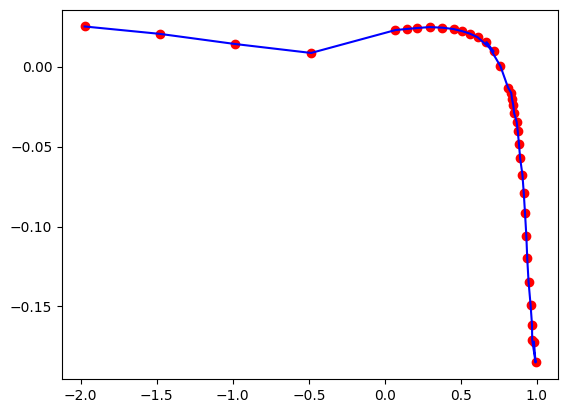

In [5]:


#y = func(x, -0.00005, 1.3, 0.05)
#rng = np.random.default_rng()
#y_noise = 0.2 * rng.normal(size=x.size)
#ydata = y + y_noise

plt.plot(x, del_lam, 'ro', label='data')
plt.plot(x, del_lam, 'b-', label='data')
#plt.plot(x, ydata, 'b-', label='data')
plt.show()

In [6]:
R = 10000 #in nm
#n_eff = 3.453 - 1.13*del_lam - 0.04*del_lam**2
del_n_eff = del_lam*88/(2*np.pi*R)

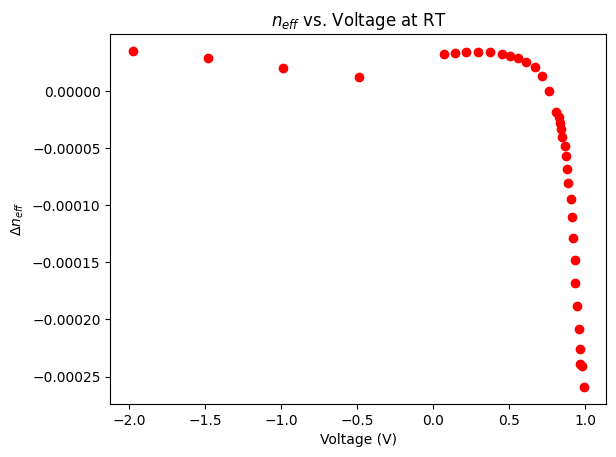

In [7]:
plt.plot(x, del_n_eff, 'ro', label='data')
#plt.plot(x, del_n_eff, 'b-', label='data')
plt.title("$n_{eff}$ vs. Voltage at RT")
plt.xlabel("Voltage (V)")
plt.ylabel("$\Delta n_{eff}$")
#plt.plot(x, ydata, 'b-', label='data')
plt.savefig("RTDelNeff.png")
plt.show()

In [8]:
np.savetxt("FinalCSVs/RTDneff.csv", np.c_[x, del_n_eff], delimiter = ",")

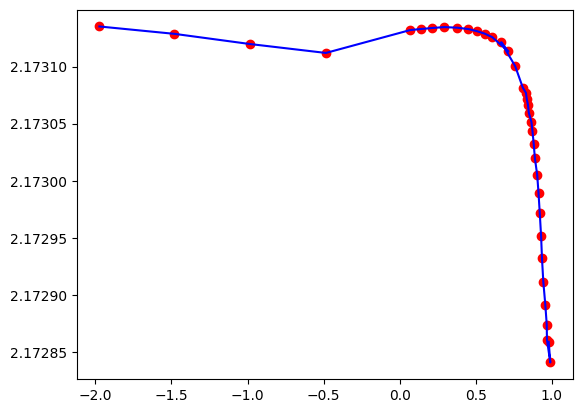

In [9]:
n_eff = 2.1731 + del_n_eff

plt.plot(x, n_eff, 'ro', label='data')
plt.plot(x, n_eff, 'b-', label='data')
#plt.plot(x, ydata, 'b-', label='data')
plt.show()

In [10]:
print(x) #print voltages

[-1.97403744 -1.48062355 -0.98633536 -0.48487238  0.07004876  0.14255237
  0.21461676  0.29369545  0.37771093  0.45225654  0.50746267  0.55859501
  0.60933997  0.71524573  0.66811206  0.76018089  0.81042849  0.83112928
  0.83573866  0.84425471  0.8496694   0.86695503  0.87395199  0.88212984
  0.88961692  0.9047326   0.91354508  0.92176116  0.93041926  0.93635167
  0.94494584  0.95825192  0.96764063  0.96894944  0.99101431  0.9804735 ]


In [11]:
np.savetxt("voltages.csv", x, delimiter = ",")

In [12]:
print(x[16],n_eff[16])

0.8104284941505213 2.1730815115026925


In [13]:
fit_neff = [2.16724674,2.16722655,2.16720363,2.16718736,2.16716575,2.1671233,2.16709645]
fit_neff = np.array(fit_neff)
voltages = [-2,-1,0,0.5,0.7,0.8,0.85]

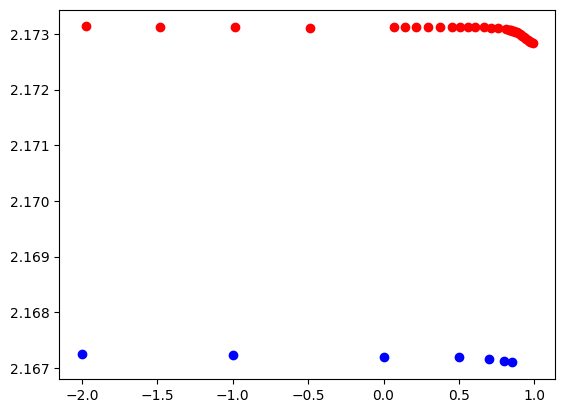

In [14]:
n_eff = 2.1731 + del_n_eff

plt.plot(x, n_eff, 'ro', label='data')
plt.plot(voltages, fit_neff, 'bo', label='data')
#plt.plot(x, ydata, 'b-', label='data')
plt.show()

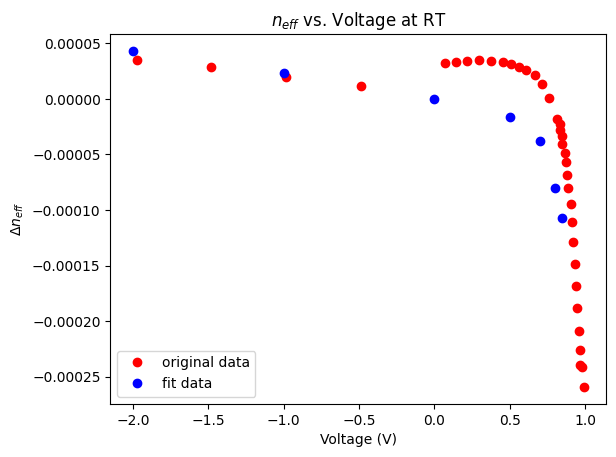

In [15]:
del_fit_neff = fit_neff - 2.16720363

plt.plot(x, del_n_eff, 'ro', label='original data')
plt.plot(voltages, del_fit_neff, 'bo', label='fit data')
plt.title("$n_{eff}$ vs. Voltage at RT")
plt.xlabel("Voltage (V)")
plt.ylabel("$\Delta n_{eff}$")
plt.legend()
plt.savefig("RTFitCheck.png")
#plt.plot(x, ydel_data, 'b-', label='data')
plt.show()

In [16]:
print(voltages)

[-2, -1, 0, 0.5, 0.7, 0.8, 0.85]


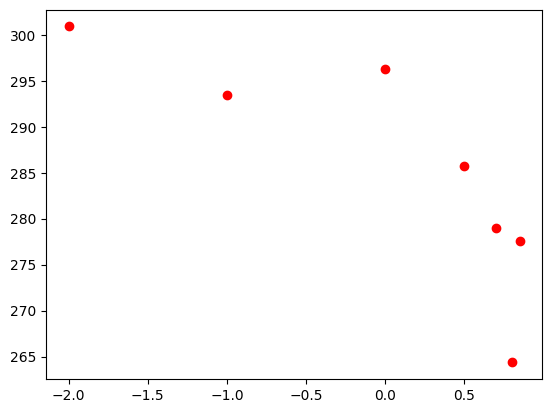

In [17]:
alpha = np.array([300.89284112, 293.46159565, 296.22671488, 285.72928925, 279.00198373, 264.36824412, 277.58444671])

plt.plot(voltages, alpha, 'ro', label='data')
#plt.plot(x, del_lam, 'b-', label='data')
#plt.plot(x, ydata, 'b-', label='data')
plt.show()

In [18]:
#saving this to a csv file
np.savetxt("FinalCSVs/RTAbsorb.csv", np.c_[voltages, alpha], delimiter = ",")

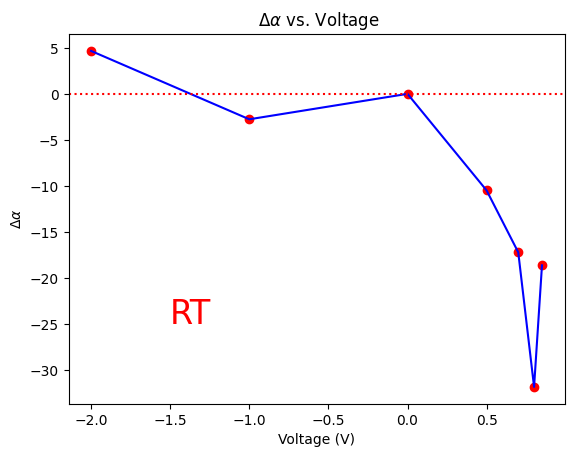

In [19]:
Dalpha = alpha - alpha[2]
plt.plot(voltages, Dalpha, 'ro', label='data')
plt.plot(voltages, Dalpha, 'b-', label='data')
plt.axhline(y = 0, color = 'r', linestyle = ':') 
plt.title( " $\\Delta \\alpha$ vs. Voltage ")
plt.xlabel('Voltage (V)')
plt.ylabel('$\\Delta \\alpha$')
plt.text(-1.5, -25, r'RT', color = "red", fontsize="24")
#plt.plot(x, del_lam, 'b-', label='data')
#plt.plot(x, ydata, 'b-', label='data')
plt.savefig("RT-D-alpha.png")
plt.show()

In [20]:
average_alpha = np.mean(alpha)
print(average_alpha)

285.32358792285714


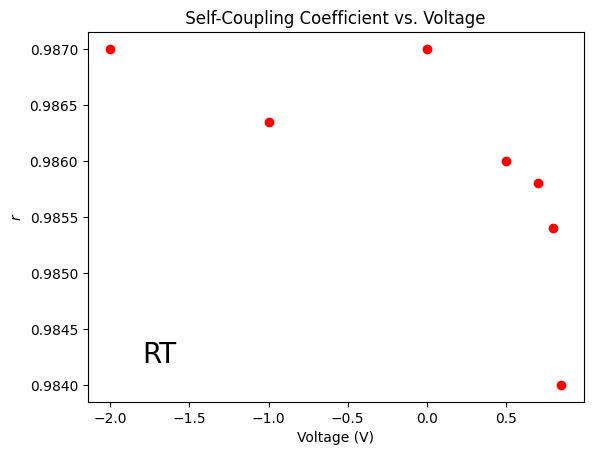

In [25]:
r = [0.987, 0.98635, 0.987, 0.986, 0.9858, 0.9854, 0.984]
plt.plot(voltages, r, 'ro', label='data')
plt.title( " Self-Coupling Coefficient vs. Voltage ")
plt.xlabel('Voltage (V)')
plt.ylabel('$r$')
plt.text(-1.8, 0.9842, r'RT', color = "black", fontsize="20")
plt.savefig("RT-r.png")
plt.show()